### Pandas IO and Groupby example

The data used in this example is from the Oklahoma Mesonet. Please review [Term of Use](https://www.mesonet.org/index.php/site/about/terms_of_use) from Oklahoma Mesonet.

### Mesonet Get DataFrame

This function returns a pandas dataframe of weather station data. Example [Oklahoma Mesonet Data url](http://www.mesonet.org/index.php/dataMdfMts/dataController/getFile/20140801nrmn/mts/TEXT/)

In [26]:
from pandas import read_fwf, concat, options, read_pickle
from datetime import datetime, timedelta
import numpy as np
import os

#Create Mesonet Cache Directory
if not os.path.exists('mesonet_cache'):
    os.makedirs('mesonet_cache')

local_data_cache = 'mesonet_cache/{0}{1}.p'

def get_mesonet_dataframe(start_date,end_date,site):
    url_template = "http://www.mesonet.org/index.php/dataMdfMts/dataController/getFile/{0}{1}/mts/TEXT/"
    day_count = (end_date - start_date).days +1
    df_pieces=[]
    for single_date in (start_date + timedelta(n) for n in range(day_count)):
        picklefile = local_data_cache.format(single_date.strftime('%Y%m%d'),site)
        if os.path.isfile(picklefile):
            df = read_pickle(picklefile)
        else:
            url = url_template.format(single_date.strftime('%Y%m%d'),site)
            df = read_fwf(url,header=2,
                          widths=[5,6,6,7,7,7,7,6,7,7,7,8,9,6,7,7,7,7,7,7,7,8,8,8],
                          na_values=['-999','-998','-997','-996','-995'],
                          skipfooter=1)
            df["DATE"]=single_date.date()
            df.to_pickle(picklefile)
        df_pieces.append(df)
    return concat(df_pieces)

### Retrieve Data

In [92]:
site="nrmn" #Norman Mesonet site
start_date = datetime(2010,1,1)
end_date = datetime(2010,4,1)
df = get_mesonet_dataframe(start_date,end_date,site)

### Pandas Groupby 

In [93]:
# Groupby Site ID and Date and find the daily min, max, mean air temperature ('TAIR')
grouped =df.groupby(['STID','DATE'])
grouped['TAIR'].agg([np.min,np.mean,np.max,np.size])

amin       mean  amax  size
STID DATE                                   
NRMN 2010-01-01  -7.9  -1.886458   8.0   288
     2010-01-02  -8.0  -3.165278   3.7   288
     2010-01-03  -4.8  -3.017014  -0.3   288
     2010-01-04  -6.9  -4.559375  -0.8   288
     2010-01-05  -4.5  -2.856250  -0.6   288
     2010-01-06  -6.0  -1.092708   6.7   288
     2010-01-07 -10.9  -6.197917   1.7   288
     2010-01-08 -14.3 -10.399306  -5.6   288
     2010-01-09 -14.4  -9.454514  -2.6   288
     2010-01-10 -13.6  -6.570139   5.2   288
     2010-01-11  -3.3   2.510764  13.5   288
     2010-01-12  -6.5   1.385069   9.9   288
     2010-01-13  -0.4   5.117361  13.9   288
     2010-01-14   7.2   9.695486  13.7   288
     2010-01-15   6.1   7.351042  11.4   288
     2010-01-16   5.7   6.406250   7.6   288
     2010-01-17   0.9   4.763889  10.3   288
     2010-01-18   6.2   9.613889  17.9   288
     2010-01-19  -0.4   6.657292  17.9   288
     2010-01-20   1.7   9.557292  17.0   288
     2010-01-21   4.1   8.239583  13.4   288
     2010-01-22   1.6   9.210069  20.6   288
     2010-01-23   9.8  12.036458  17.9   288
     2010-01-24   1.6   6.645486  11.3   288
     2010-01-25  -0.6   4.911111  11.6   288
     2010-01-26  -3.4   3.125694  10.4   288
     2010-01-27   5.8  10.178472  18.6   288
     2010-01-28  -2.1   3.481597  15.8   288
     2010-01-29  -5.6  -3.177778  -1.1   288
     2010-01-30  -7.5  -6.126042  -3.8   288
     2010-01-31  -5.8  -4.620139  -2.7   288
     2010-02-01  -3.1  -1.760764  -0.1   288
     2010-02-02  -0.4   0.541667   2.9   288
     2010-02-03  -2.2  -0.050694   3.1   288
     2010-02-04   1.6   2.155903   3.1   288
     2010-02-05   1.9   4.578472  10.8   288
     2010-02-06   0.0   2.238194   6.7   288
     2010-02-07   1.1   2.056250   3.8   288
     2010-02-08   0.4   1.923611   2.6   288
     2010-02-09  -6.9  -2.916667   1.4   288
     2010-02-10  -5.9  -2.892361   1.1   288
     2010-02-11  -0.8   0.248611   1.3   288
     2010-02-12  -0.9   1.218056   8.6   288
     2010-02-13  -1.6   3.328125  13.6   288
     2010-02-14  -1.2   2.031597  10.7   288
     2010-02-15  -4.5  -0.318056   5.2   288
     2010-02-16  -5.2  -0.214583   6.5   288
     2010-02-17  -5.8   1.161806  10.5   288
     2010-02-18  -0.8   6.582292  17.1   288
     2010-02-19   5.7   9.395486  13.8   288
     2010-02-20   3.3   5.812500  10.3   288
     2010-02-21   0.9   5.059722   8.3   288
     2010-02-22  -1.4  -0.312847   1.8   288
     2010-02-23  -3.5   0.317708   6.5   288
     2010-02-24  -6.6  -0.211458   7.5   288
     2010-02-25   0.1   4.677431  11.3   288
     2010-02-26   0.2   3.571528   8.6   288
     2010-02-27  -2.8   4.563194  14.4   288
     2010-02-28   1.4   7.332639  13.7   288
     2010-03-01   2.8   5.508333  11.3   288
     2010-03-02  -2.4   2.765278   9.2   288
     2010-03-03  -3.8   3.994097  13.5   288
     2010-03-04   0.4   8.050694  17.5   288
     2010-03-05   7.6  13.129167  20.8   288
     2010-03-06  10.8  14.264931  17.8   288
     2010-03-07  11.8  13.587500  16.0   288
     2010-03-08   8.8  10.639931  13.9   288
     2010-03-09   9.0  13.359722  19.6   288
     2010-03-10   2.6  10.513542  17.6   288
     2010-03-11   2.3   6.737847  12.5   288
     2010-03-12   3.3   8.042361  14.2   288
     2010-03-13   3.3   9.056944  15.7   288
     2010-03-14   1.3   7.006250  13.8   288
     2010-03-15   7.1   9.803819  12.8   288
     2010-03-16   7.1   9.265278  12.1   288
     2010-03-17   0.7   5.835417  12.7   288
     2010-03-18  -1.5   6.957292  17.1   288
     2010-03-19   6.1  13.040625  21.8   288
     2010-03-20  -1.8   1.052431  18.3   288
     2010-03-21  -2.8   0.045833   6.2   288
     2010-03-22  -3.0   5.744444  17.3   288
     2010-03-23   6.7  13.761111  24.3   288
     2010-03-24  13.1  15.983681  21.3   288
     2010-03-25   6.8  10.510069  16.0   288
     2010-03-26   1.6  10.058681  18.9   288
     2010-03-27   6.9  11.913889  16.0   288
     2010-03-28   5.7   9.421181  15.5   288
     2010-03

In [46]:
% matplotlib inline

In [47]:
import matplotlib
matplotlib.style.use('ggplot')

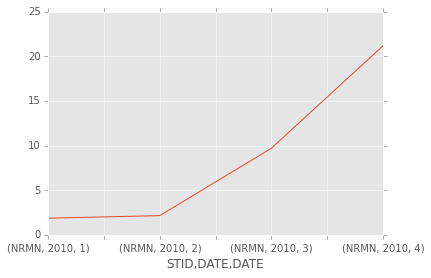

In [101]:
#import matplotlib.pyplot as plt
grp = grouped['TAIR'].mean()
grp.plot(x='DATE')
#grouped.columns
#data[0][:10].plot(x='PLAYER',y='PPG',kind='bar')
#for i, group in grouped['TAIR'].mean:
    #plt.figure()
    #print(i,group)
    #group.plot(x='DATE',y='MEAN',kind='bar')
    #print (i,group)
#df1=grouped['TAIR']

### Adjust the Pandas Display Options
The display shows some useful information, but not able to see table dataset. Let's fix that with setting the max display columns and display rows. 

In [95]:
# Set Pandas Display max column and rows 
# options was imported from the pandas library - See Code line 1
# Max Columns is not needed for our example(Our grouped dataframe has 4 columns), but want to show how to set. 
options.display.max_columns = 50
options.display.max_rows = 100
# Groupby Site ID and Date
grouped['TAIR'].agg(['min','mean','max','std','size'])

min       mean   max       std  size
STID DATE                                             
NRMN 2010-01-01  -7.9  -1.886458   8.0  5.317277   288
     2010-01-02  -8.0  -3.165278   3.7  3.606157   288
     2010-01-03  -4.8  -3.017014  -0.3  1.113563   288
     2010-01-04  -6.9  -4.559375  -0.8  1.850807   288
     2010-01-05  -4.5  -2.856250  -0.6  1.175014   288
     2010-01-06  -6.0  -1.092708   6.7  3.996782   288
     2010-01-07 -10.9  -6.197917   1.7  3.425910   288
     2010-01-08 -14.3 -10.399306  -5.6  2.540597   288
     2010-01-09 -14.4  -9.454514  -2.6  3.707800   288
     2010-01-10 -13.6  -6.570139   5.2  6.474260   288
     2010-01-11  -3.3   2.510764  13.5  5.619595   288
     2010-01-12  -6.5   1.385069   9.9  5.016741   288
     2010-01-13  -0.4   5.117361  13.9  4.728420   288
     2010-01-14   7.2   9.695486  13.7  2.010360   288
     2010-01-15   6.1   7.351042  11.4  1.158847   288
     2010-01-16   5.7   6.406250   7.6  0.575059   288
     2010-01-17   0.9   4.763889  10.3  2.714180   288
     2010-01-18   6.2   9.613889  17.9  3.892754   288
     2010-01-19  -0.4   6.657292  17.9  5.747523   288
     2010-01-20   1.7   9.557292  17.0  4.595804   288
     2010-01-21   4.1   8.239583  13.4  2.684053   288
     2010-01-22   1.6   9.210069  20.6  6.548187   288
     2010-01-23   9.8  12.036458  17.9  1.706074   288
     2010-01-24   1.6   6.645486  11.3  2.396363   288
     2010-01-25  -0.6   4.911111  11.6  3.722801   288
     2010-01-26  -3.4   3.125694  10.4  3.973576   288
     2010-01-27   5.8  10.178472  18.6  4.528865   288
     2010-01-28  -2.1   3.481597  15.8  5.894796   288
     2010-01-29  -5.6  -3.177778  -1.1  1.422147   288
     2010-01-30  -7.5  -6.126042  -3.8  1.199440   288
     2010-01-31  -5.8  -4.620139  -2.7  0.932949   288
     2010-02-01  -3.1  -1.760764  -0.1  0.826956   288
     2010-02-02  -0.4   0.541667   2.9  0.857311   288
     2010-02-03  -2.2  -0.050694   3.1  1.623413   288
     2010-02-04   1.6   2.155903   3.1  0.437804   288
     2010-02-05   1.9   4.578472  10.8  3.279185   288
     2010-02-06   0.0   2.238194   6.7  1.574824   288
     2010-02-07   1.1   2.056250   3.8  0.678204   288
     2010-02-08   0.4   1.923611   2.6  0.498428   288
     2010-02-09  -6.9  -2.916667   1.4  2.788553   288
     2010-02-10  -5.9  -2.892361   1.1  2.194119   288
     2010-02-11  -0.8   0.248611   1.3  0.473991   288
     2010-02-12  -0.9   1.218056   8.6  3.090294   288
     2010-02-13  -1.6   3.328125  13.6  5.109860   288
     2010-02-14  -1.2   2.031597  10.7  2.593548   288
     2010-02-15  -4.5  -0.318056   5.2  3.089662   288
     2010-02-16  -5.2  -0.214583   6.5  3.774294   288
     2010-02-17  -5.8   1.161806  10.5  5.286799   288
     2010-02-18  -0.8   6.582292  17.1  5.955947   288
     2010-02-19   5.7   9.395486  13.8  2.501946   288
     2010-02-20   3.3   5.812500  10.3  2.007213   288
     2010-02-21   0.9   5.059722   8.3  1.981124   288
     2010-02-22  -1.4  -0.312847   1.8  0.874379   288
     2010-02-23  -3.5   0.317708   6.5  3.204244   288
     2010-02-24  -6.6  -0.211458   7.5  4.210611   288
     2010-02-25   0.1   4.677431  11.3  3.628172   288
     2010-02-26   0.2   3.571528   8.6  2.473051   288
     2010-02-27  -2.8   4.563194  14.4  5.949764   288
     2010-02-28   1.4   7.332639  13.7  4.143806   288
     2010-03-01   2.8   5.508333  11.3  1.946837   288
     2010-03-02  -2.4   2.765278   9.2  3.179186   288
     2010-03-03  -3.8   3.994097  13.5  5.765088   288
     2010-03-04   0.4   8.050694  17.5  5.790861   288
     2010-03-05   7.6  13.129167  20.8  4.235117   288
     2010-03-06  10.8  14.264931  17.8  2.003773   288
     2010-03-07  11.8  13.587500  16.0  1.023206   288
     2010-03-08   8.8  10.639931  13.9  1.377635   288
     2010-03-09   9.0  13.359722  19.6  3.028686   288
     2010-03-10   2.6  10.513542  17.6  4.105345   288
     2010-03-11   2.3   6.737847  12.5  3.139230   288
     2010-03-12   3.3   8.042361  14.2  3.473956   288
   

### Group By Date.Year and Date.Month

In [96]:
grouped = df.groupby(['STID',df['DATE'].map(lambda x: x.year) ,df['DATE'].map(lambda x: x.month),])
grouped['TAIR'].agg(['min','mean','max','std','size'])

min       mean   max       std  size
STID DATE DATE                                       
NRMN 2010 1    -14.4   1.863351  20.6  7.414409  8928
          2     -6.9   2.147049  17.1  4.321797  8064
          3     -3.8   9.690995  30.4  6.233062  8928
          4     16.0  21.161111  27.5  3.213584   288

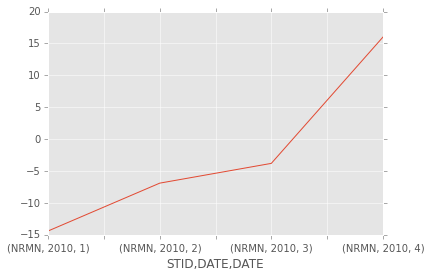

In [102]:
grp1 = grouped['TAIR'].min()
grp1.plot(x='DATE')